<a href="https://colab.research.google.com/github/devLarissaRodrigues/Bootcamp-DataAnalytics-WoMakersCode/blob/main/Exercicio_individual_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

### Importando os dois datasets a serem utilizados neste exercício

In [8]:
file_id_1 = '1wE87ICJtA3wTK21tMRGTNcBGGrT-Reww'
url_1 = f'https://drive.google.com/uc?export=download&id={file_id_1}'

file_id_2 = '1V2HvH2aZiiSlpJNmkxxtQPnKMKZNU5at'
url_2 = f'https://drive.google.com/uc?export=download&id={file_id_2}'

Desafio Prático 1: Visualizando Dados Diferentes
Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando
Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos
dados, correlações entre variáveis e tendências.
Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (saude.csv).
2. Criar um histograma da variável 'age' usando Matplotlib.
3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando
Seaborn.
4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.


In [16]:
# Desafio 1 - Questão 1
df_saude = pd.read_csv(url_1)
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


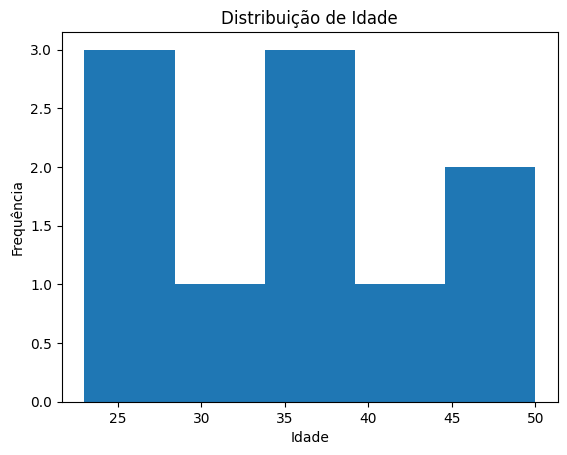

In [17]:
# Desafio 1 - Questão 2
plt.figure()
plt.hist(df_saude['age'], bins='auto')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

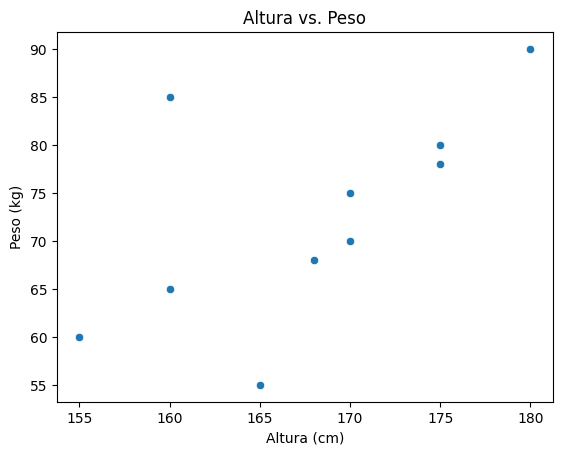

In [18]:
# Desafio 1 - Questão 3
plt.figure()
sns.scatterplot(data=df_saude, x='height', y='weight')
plt.title('Altura vs. Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

In [25]:
# Desafio 1 - Questão 4
gender_counts = df_saude['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(
    gender_counts,
    x='gender',
    y='count',
    labels={'gender': 'Gênero', 'count': 'Contagem'},
    title='Contagem de Indivíduos por Gênero'
)
fig.show()

Desafio Prático 2: Séries Temporais
Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de
vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar
tendências e sazonalidades.
Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).
2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.
3. Criar um gráfico de decomposição sazonal usando Seaborn.
4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo
do tempo usando Plotly.

In [36]:
# Desafio 2 - Questão 1
df_vendas = pd.read_csv(url_2)
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [37]:
df_vendas = (
    pd.read_csv(url_2, parse_dates=["date"])
      .sort_values("date")
)

df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


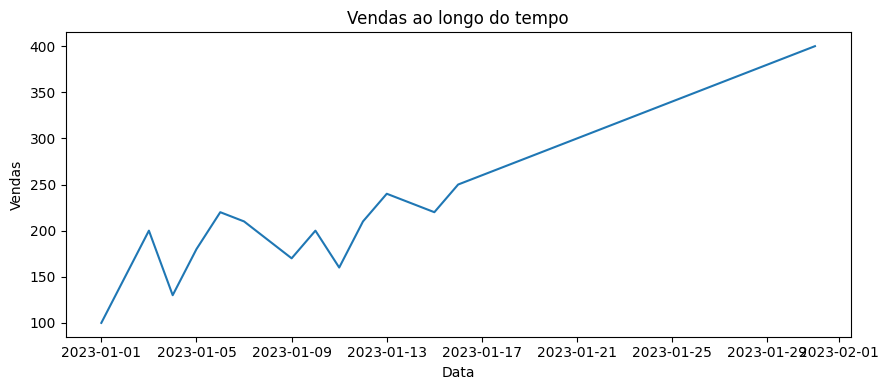

In [39]:
# Desafio 2 - Questão 2
plt.figure(figsize=(9,4))
plt.plot(df_vendas["date"], df_vendas["sales"])
plt.title("Vendas ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()


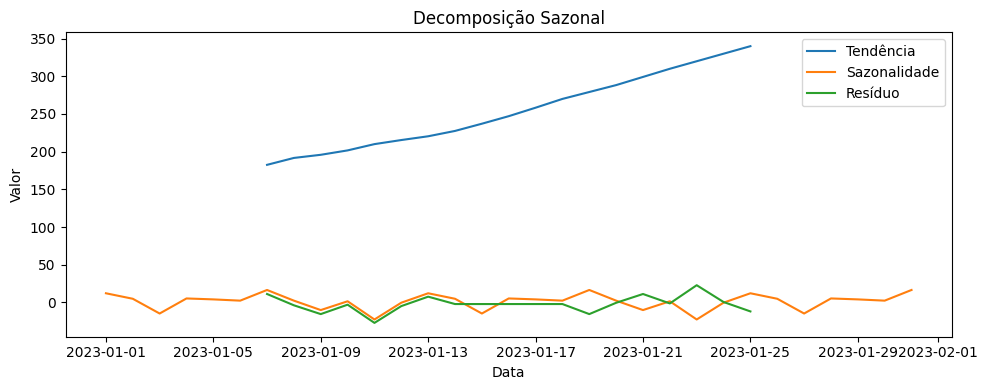

In [44]:
# Desafio 2 - Questão 3
resultado = seasonal_decompose(
    df_vendas.set_index("date")["sales"],
    model="additive",
    period=12
)

comp = (pd.concat({
          "Tendência":    resultado.trend,
          "Sazonalidade": resultado.seasonal,
          "Resíduo":      resultado.resid
        }, axis=1)
        .reset_index()
        .melt(id_vars="date", var_name="Componente", value_name="Valor"))

plt.figure(figsize=(10,4))
sns.lineplot(data=comp, x="date", y="Valor", hue="Componente")
plt.title("Decomposição Sazonal")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend(title="")
plt.tight_layout()
plt.show()

In [40]:
# Desafio 2 - Questão 4
fig = px.line(
    df_vendas,
    x="date",
    y="sales",
    title="Vendas ao longo do tempo (interativo)",
    labels={"data":"Data", "vendas":"Vendas"}
)
fig.update_traces(mode="lines+markers")
fig.show()